<a href="https://colab.research.google.com/github/Bilal-Ali99/Student_score_prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Virtual Environment

In [67]:
#!pip install virtualenv
# !virtualenv my-venv

# Activating the virtual environment

In [68]:
!source my-venv/bin/activate

/bin/bash: line 1: my-venv/bin/activate: No such file or directory


# Importing Relevant libraries

In [69]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [71]:
df = pd.read_csv('/content/drive/MyDrive/elevvo/Task 1/StudentPerformanceFactors.csv')

In [72]:
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [73]:
# Checking basic information

print("Data Type of the features present in the dataset")
print("\n")
print(df.dtypes) # checking the datatype of features
print("\n")
print("Dataframe Shape: ",format(df.shape)) # checking the dataframe
print("\n")
print("Missing Values are:")
print("\n")
print(df.isnull().sum()) # checking the missing values

Data Type of the features present in the dataset


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


Dataframe Shape:  (6607, 20)


Missing Values are:


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracur

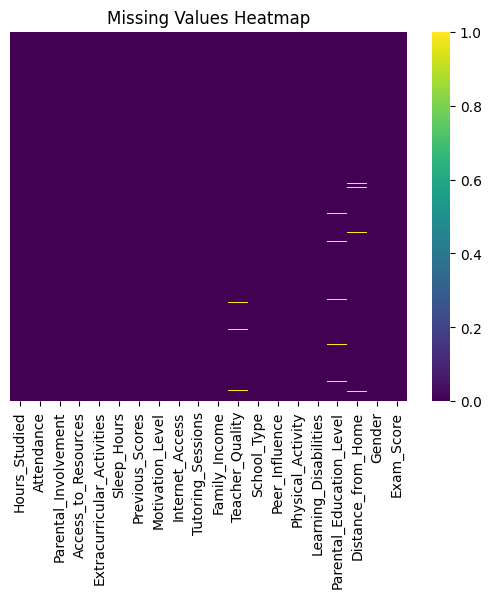

In [74]:
sns.heatmap(df.isnull(), yticklabels=False , cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [75]:
print(df['Teacher_Quality'].unique())
print(df['Parental_Education_Level'].unique())
print(df['Distance_from_Home'].unique())

['Medium' 'High' 'Low' nan]
['High School' 'College' 'Postgraduate' nan]
['Near' 'Moderate' 'Far' nan]


In [76]:
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    print(f"\n{col} distribution:")
    print(df[col].value_counts(normalize=True))


Teacher_Quality distribution:
Teacher_Quality
Medium    0.601164
High      0.298208
Low       0.100628
Name: proportion, dtype: float64

Parental_Education_Level distribution:
Parental_Education_Level
High School     0.494553
College         0.305202
Postgraduate    0.200246
Name: proportion, dtype: float64

Distance_from_Home distribution:
Distance_from_Home
Near        0.593884
Moderate    0.305505
Far         0.100612
Name: proportion, dtype: float64


In [77]:
# checking which value is the most frequent value in each column

print("Teacher_Quality value counts:")
print(df['Teacher_Quality'].value_counts(dropna=False))

print("\nParental_Education_Level value counts:")
print(df['Parental_Education_Level'].value_counts(dropna=False))

print("\nDistance_From_Home value counts:")
print(df['Distance_from_Home'].value_counts(dropna=False))

Teacher_Quality value counts:
Teacher_Quality
Medium    3925
High      1947
Low        657
NaN         78
Name: count, dtype: int64

Parental_Education_Level value counts:
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
NaN               90
Name: count, dtype: int64

Distance_From_Home value counts:
Distance_from_Home
Near        3884
Moderate    1998
Far          658
NaN           67
Name: count, dtype: int64


In [78]:
# Removing the missing value in Distance_from_Home and replacing the  missing values in the Teacher_Quality and Parental_Eduaction_Level with the most repeatitive value so that the data is cleaned and meaningful

df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df = df.dropna(subset=['Distance_from_Home'])

In [79]:
# verifying that the missing value is droped and the replacing values are replaced

print("\nAfter cleaning:")
print("Teacher_Quality nulls:", df['Teacher_Quality'].isnull().sum())
print("Parental_Education_Level nulls:", df['Parental_Education_Level'].isnull().sum())
print("Distance_From_Home nulls:", df['Distance_from_Home'].isnull().sum())



After cleaning:
Teacher_Quality nulls: 0
Parental_Education_Level nulls: 0
Distance_From_Home nulls: 0


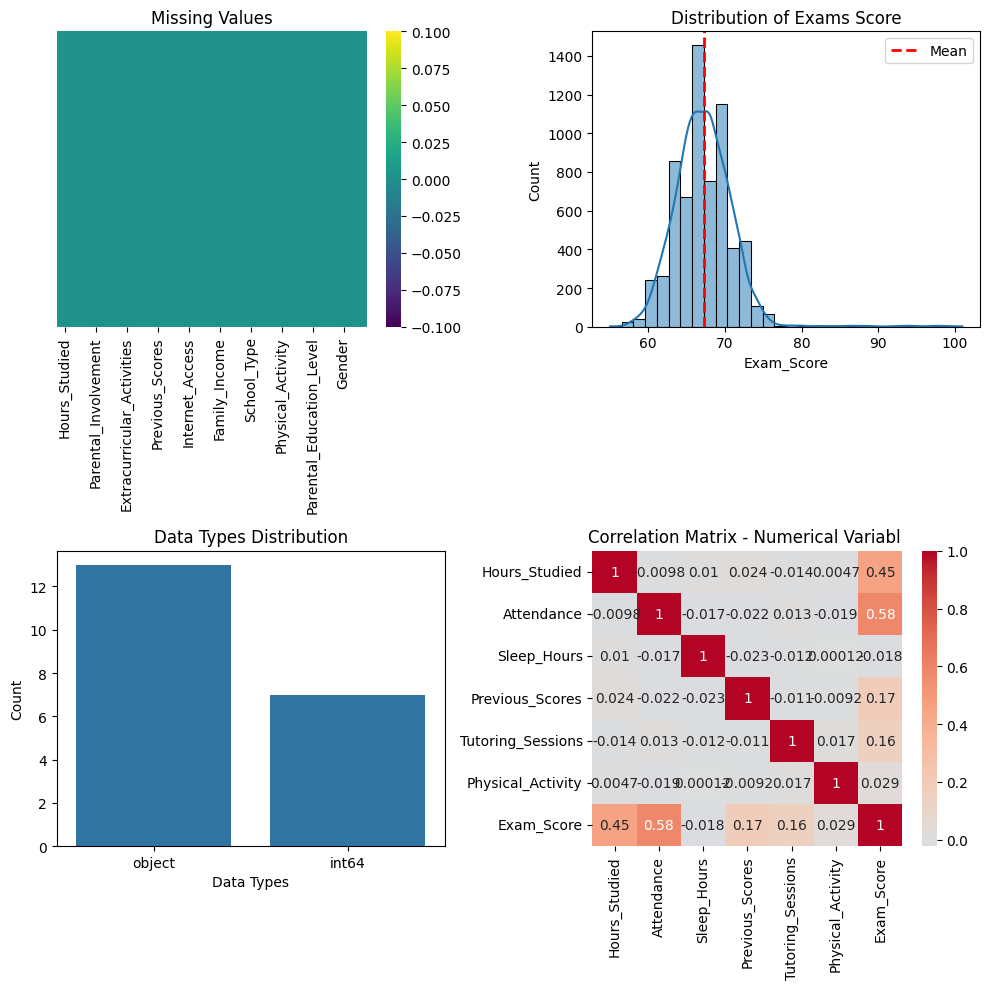

In [80]:
# Verifying and visualizing the missing values in the dataset are removed
fig , axes = plt.subplots(2,2,figsize = (10,10))
sns.heatmap(df.isnull(), yticklabels=False , cbar=True, cmap='viridis', ax=axes[0,0])
axes[0,0].set_title('Missing Values')



# Distribution of Target variable
sns.histplot(data=df, x='Exam_Score', bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Exams Score')
axes[0,1].axvline(df['Exam_Score'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[0,1].legend()


# Data Type Visualization

data_types = df.dtypes.value_counts()
sns.barplot(x=data_types.index, y=data_types.values, ax=axes[1,0])
axes[1,0].set_title('Data Types Distribution')
axes[1,0].set_xlabel('Data Types')
axes[1,0].set_ylabel('Count')

# Visualizing the Correlation Matrics for numerical values

numerical_cols = df.select_dtypes(include = [np.number]).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm',center = 0, ax =axes[1,1])
axes[1,1].set_title('Correlation Matrix - Numerical Variabl ')

plt.tight_layout()
plt.show()

Doing Exploratory Data Analysis - key Performance Drivers

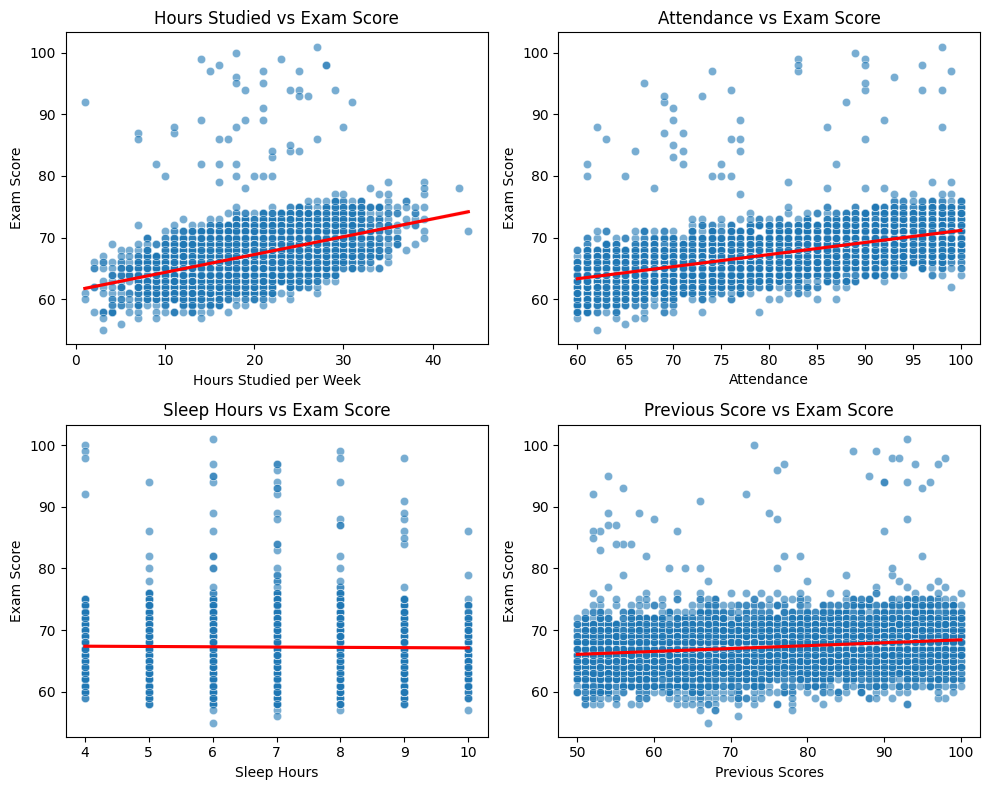

Study Habits Correlation with Exam Score:
Exam_Score         1.000000
Attendance         0.580462
Hours_Studied      0.445016
Previous_Scores    0.173880
Sleep_Hours       -0.017642
Name: Exam_Score, dtype: float64


In [81]:
# Understanding Study Habits and Academic Performance and creating a comprehensive study habits analysis
fig, axes = plt.subplots(2,2, figsize = ( 10, 8))

sns.scatterplot( data = df, x = 'Hours_Studied', y='Exam_Score', alpha = 0.6, ax = axes[0,0])
sns.regplot(data=df, x = 'Hours_Studied', y = 'Exam_Score', scatter= False, color='red', ax = axes[0,0])
axes[0,0].set_title('Hours Studied vs Exam Score')
axes[0,0].set_xlabel('Hours Studied per Week')
axes[0,0].set_ylabel('Exam Score')


sns.scatterplot(data=df, x='Attendance',y ='Exam_Score',alpha=0.6, ax = axes[0,1])
sns.regplot(data = df, x = 'Attendance', y = 'Exam_Score',scatter = False, color = 'red', ax = axes[0,1])
axes[0,1].set_title('Attendance vs Exam Score')
axes[0,1].set_xlabel('Attendance')
axes[0,1].set_ylabel('Exam Score')

sns.scatterplot(data=df, x='Sleep_Hours',y ='Exam_Score',alpha=0.6, ax = axes[1,0])
sns.regplot(data = df, x = 'Sleep_Hours', y = 'Exam_Score',scatter = False, color = 'red', ax = axes[1,0])
axes[1,0].set_title('Sleep Hours vs Exam Score')
axes[1,0].set_xlabel('Sleep Hours')
axes[1,0].set_ylabel('Exam Score')

sns.scatterplot(data=df, x='Previous_Scores',y ='Exam_Score',alpha=0.6, ax = axes[1,1])
sns.regplot(data = df, x = 'Previous_Scores', y = 'Exam_Score',scatter = False, color = 'red', ax = axes[1,1])
axes[1,1].set_title('Previous Score vs Exam Score')
axes[1,1].set_xlabel('Previous Scores')
axes[1,1].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()

study_correlations = df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Exam_Score']].corr()['Exam_Score'].sort_values(ascending = False)
print("Study Habits Correlation with Exam Score:")
print(study_correlations)

Analysing the Socio Economic Factors

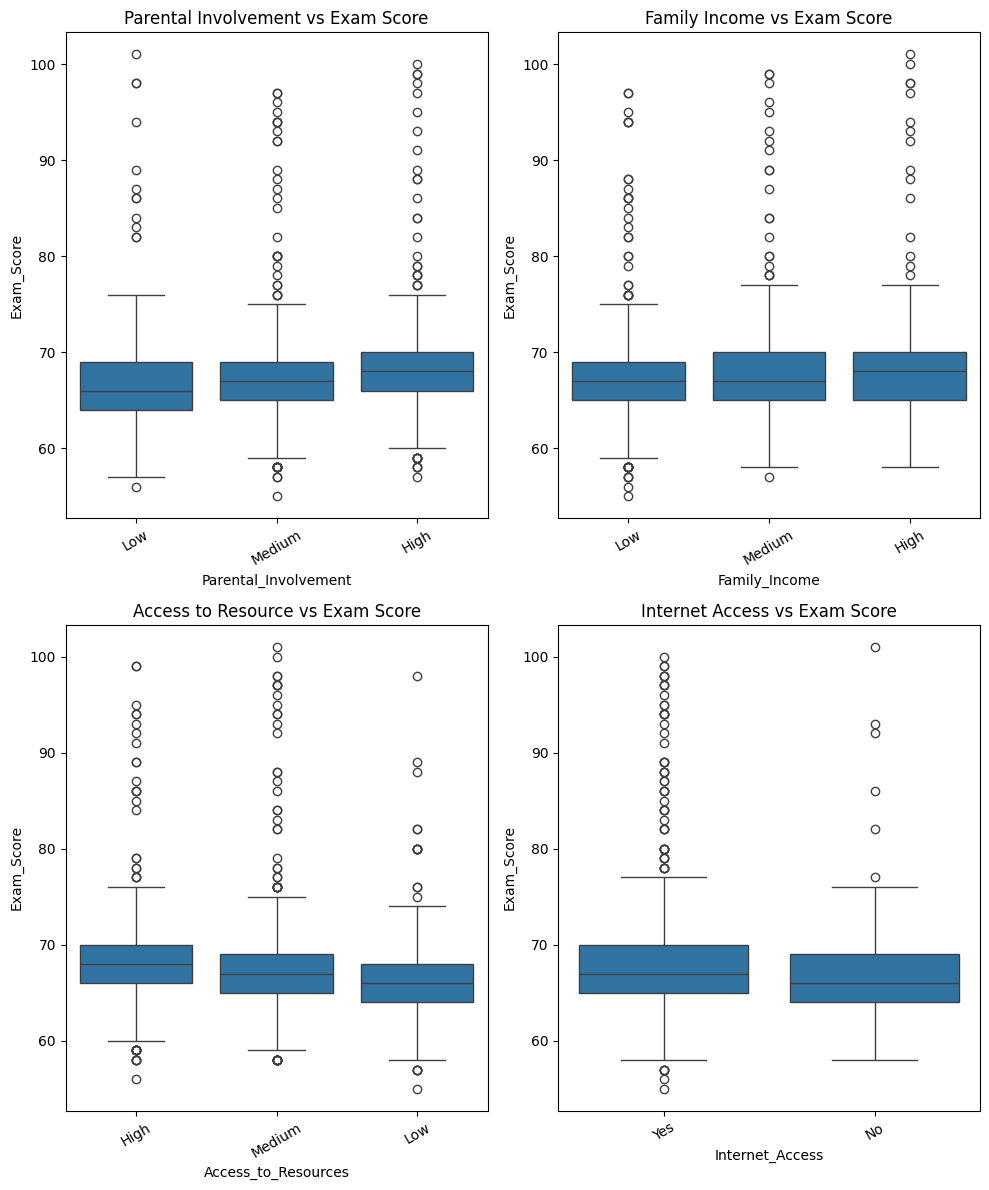

Parental_Involvement - F-statistic: 83.9491, p-value: 0.0000
Family_Income - F-statistic: 29.1524, p-value: 0.0000
Access_to_Resources - F-statistic: 96.3939, p-value: 0.0000
Internet_Access - F-statistic: 16.7631, p-value: 0.0000
Exam_Score - F-statistic: inf, p-value: 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [82]:
from scipy import stats

fig, axes = plt.subplots(2,2, figsize = (10,12))

# Checking the parental Involvelment

sns.boxplot(data=df, x='Parental_Involvement',y='Exam_Score', ax=axes[0,0])
axes[0,0].set_title('Parental Involvement vs Exam Score')
axes[0,0].tick_params(axis='x',rotation = 30)


# Checking the Family income

sns.boxplot(data=df, x='Family_Income',y='Exam_Score', ax=axes[0,1])
axes[0,1].set_title('Family Income vs Exam Score')
axes[0,1].tick_params(axis='x',rotation = 30)

sns.boxplot(data=df, x='Access_to_Resources',y='Exam_Score', ax=axes[1,0])
axes[1,0].set_title('Access to Resource vs Exam Score')
axes[1,0].tick_params(axis='x',rotation = 30)

sns.boxplot(data=df, x='Internet_Access',y='Exam_Score', ax=axes[1,1])
axes[1,1].set_title('Internet Access vs Exam Score')
axes[1,1].tick_params(axis='x',rotation = 30)

plt.tight_layout()
plt.show()

socio_ecnomicfactors = df[['Parental_Involvement','Family_Income','Access_to_Resources','Internet_Access','Exam_Score']]
for factors in socio_ecnomicfactors.columns:
  groups = [groups['Exam_Score'].values for name, groups in df.groupby(factors)]
  f_stat, p_value = stats.f_oneway(*groups)
  print(f"{factors} - F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

Analysing the Educational Environment Factors

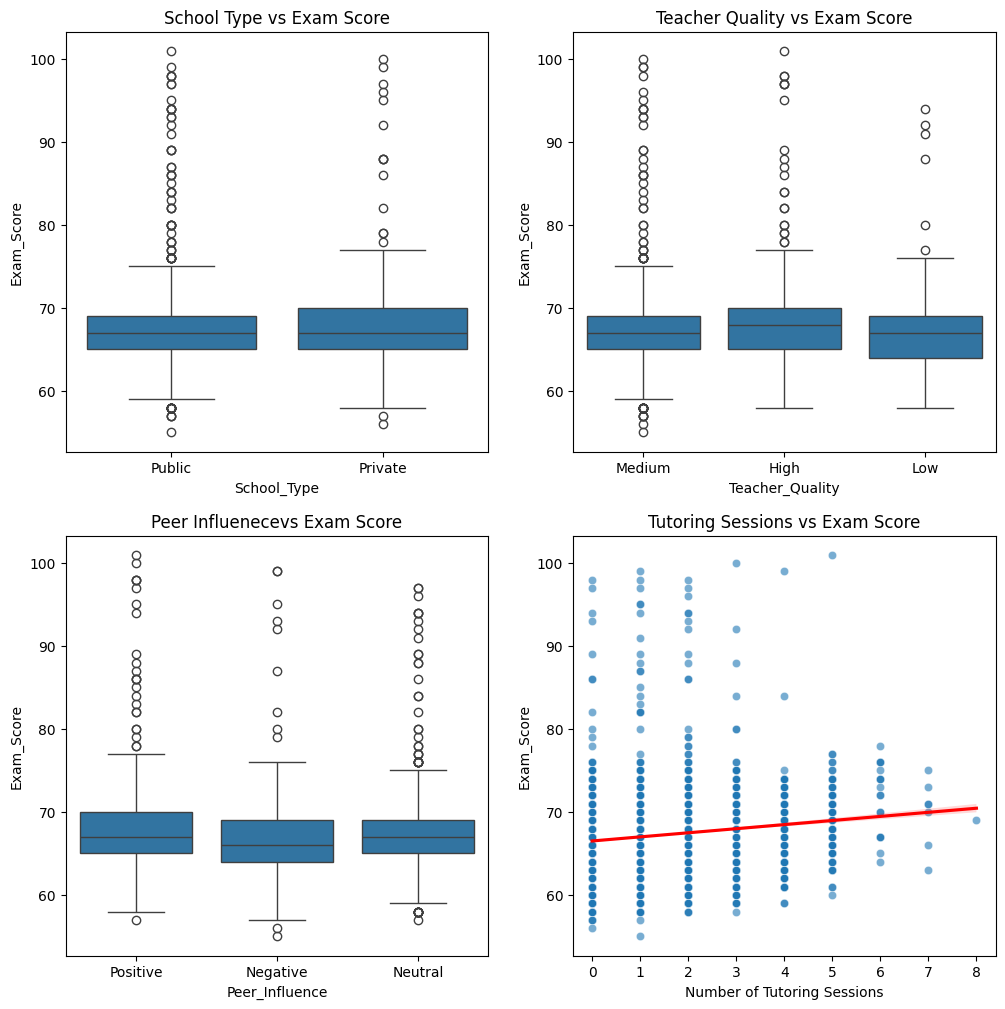

In [83]:
fig , axes = plt.subplots(2,2,figsize=(12,12))
sns.boxplot(data=df , x='School_Type', y = 'Exam_Score', ax = axes[0,0])
axes[0,0].set_title('School Type vs Exam Score')



sns.boxplot(data=df , x='Teacher_Quality',y='Exam_Score', ax= axes[0,1])
axes[0,1].set_title('Teacher Quality vs Exam Score')



sns.boxplot(data=df , x='Peer_Influence',y='Exam_Score', ax= axes[1,0])
axes[1,0].set_title('Peer Influenecevs Exam Score')


sns.scatterplot(data = df, x='Tutoring_Sessions', y= 'Exam_Score',alpha=0.6, ax = axes[1,1])
sns.regplot(data = df, x = 'Tutoring_Sessions', y = 'Exam_Score',scatter = False, color = 'red', ax = axes[1,1])
axes[1,1].set_title('Tutoring Sessions vs Exam Score')
axes[1,1].set_xlabel('Number of Tutoring Sessions')


plt.tight_layout
plt.show()

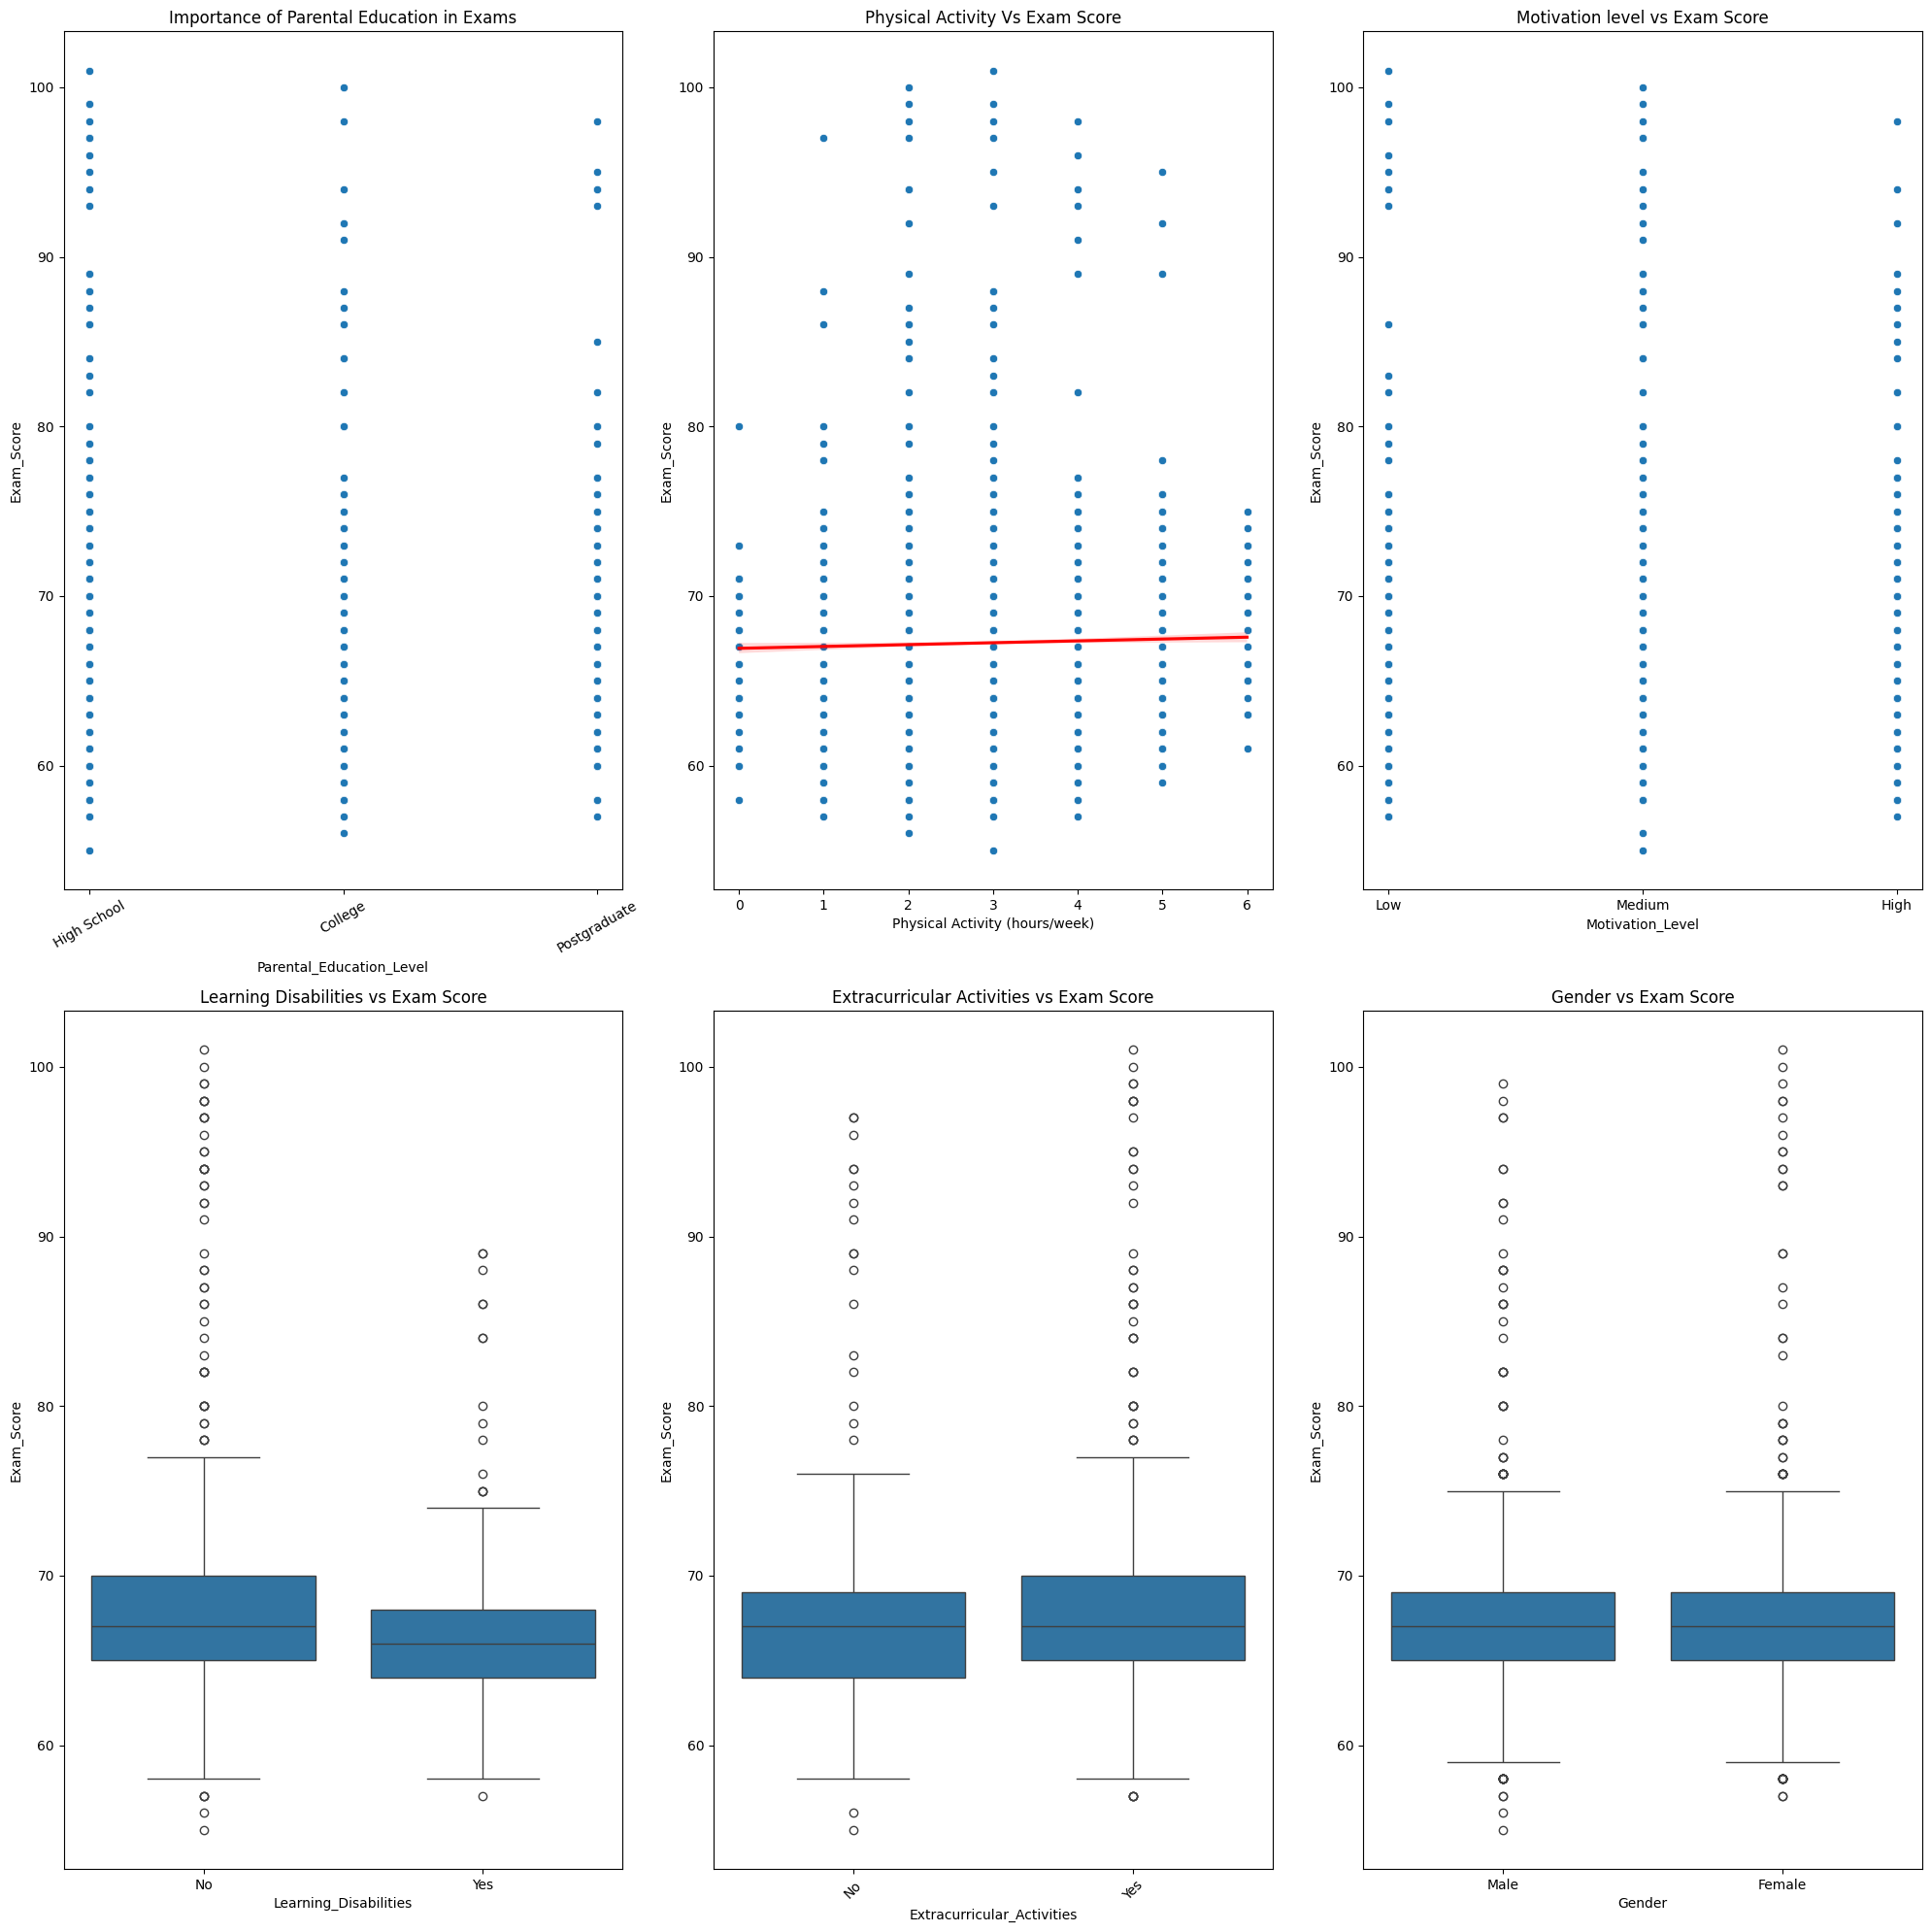

In [84]:
fig,axes = plt.subplots(2,3, figsize = (20,20))

sns.scatterplot(data=df, x='Parental_Education_Level',y='Exam_Score',ax=axes[0,0])
axes[0,0].set_title('Importance of Parental Education in Exams')
axes[0,0].tick_params(axis='x',rotation = 30)

sns.scatterplot(data=df, x='Physical_Activity',y='Exam_Score',ax=axes[0,1])
sns.regplot(data = df, x = 'Physical_Activity', y = 'Exam_Score',scatter = False, color = 'red', ax = axes[0,1])
axes[0,1].set_title('Physical Activity Vs Exam Score')
axes[0,1].set_xlabel('Physical Activity (hours/week)')

sns.scatterplot(data=df, x='Motivation_Level',y='Exam_Score',ax=axes[0,2])
axes[0,2].set_title('Motivation level vs Exam Score')


sns.boxplot(data=df, x='Learning_Disabilities', y='Exam_Score', ax=axes[1,0])
axes[1,0].set_title('Learning Disabilities vs Exam Score')


sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score', ax=axes[1,1])
axes[1,1].set_title('Extracurricular Activities vs Exam Score')
axes[1,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Gender', y='Exam_Score', ax=axes[1,2])
axes[1,2].set_title('Gender vs Exam Score')

plt.tight_layout()
plt.show()


Checking the Performance according to different categories

/tmp/ipython-input-2013487601.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_by_performance = df.groupby('Performance_Category')[['Hours_Studied','Attendance','Sleep_Hours']].mean()


Text(0.5, 1.0, 'Performance With Respect to Access to Resources')

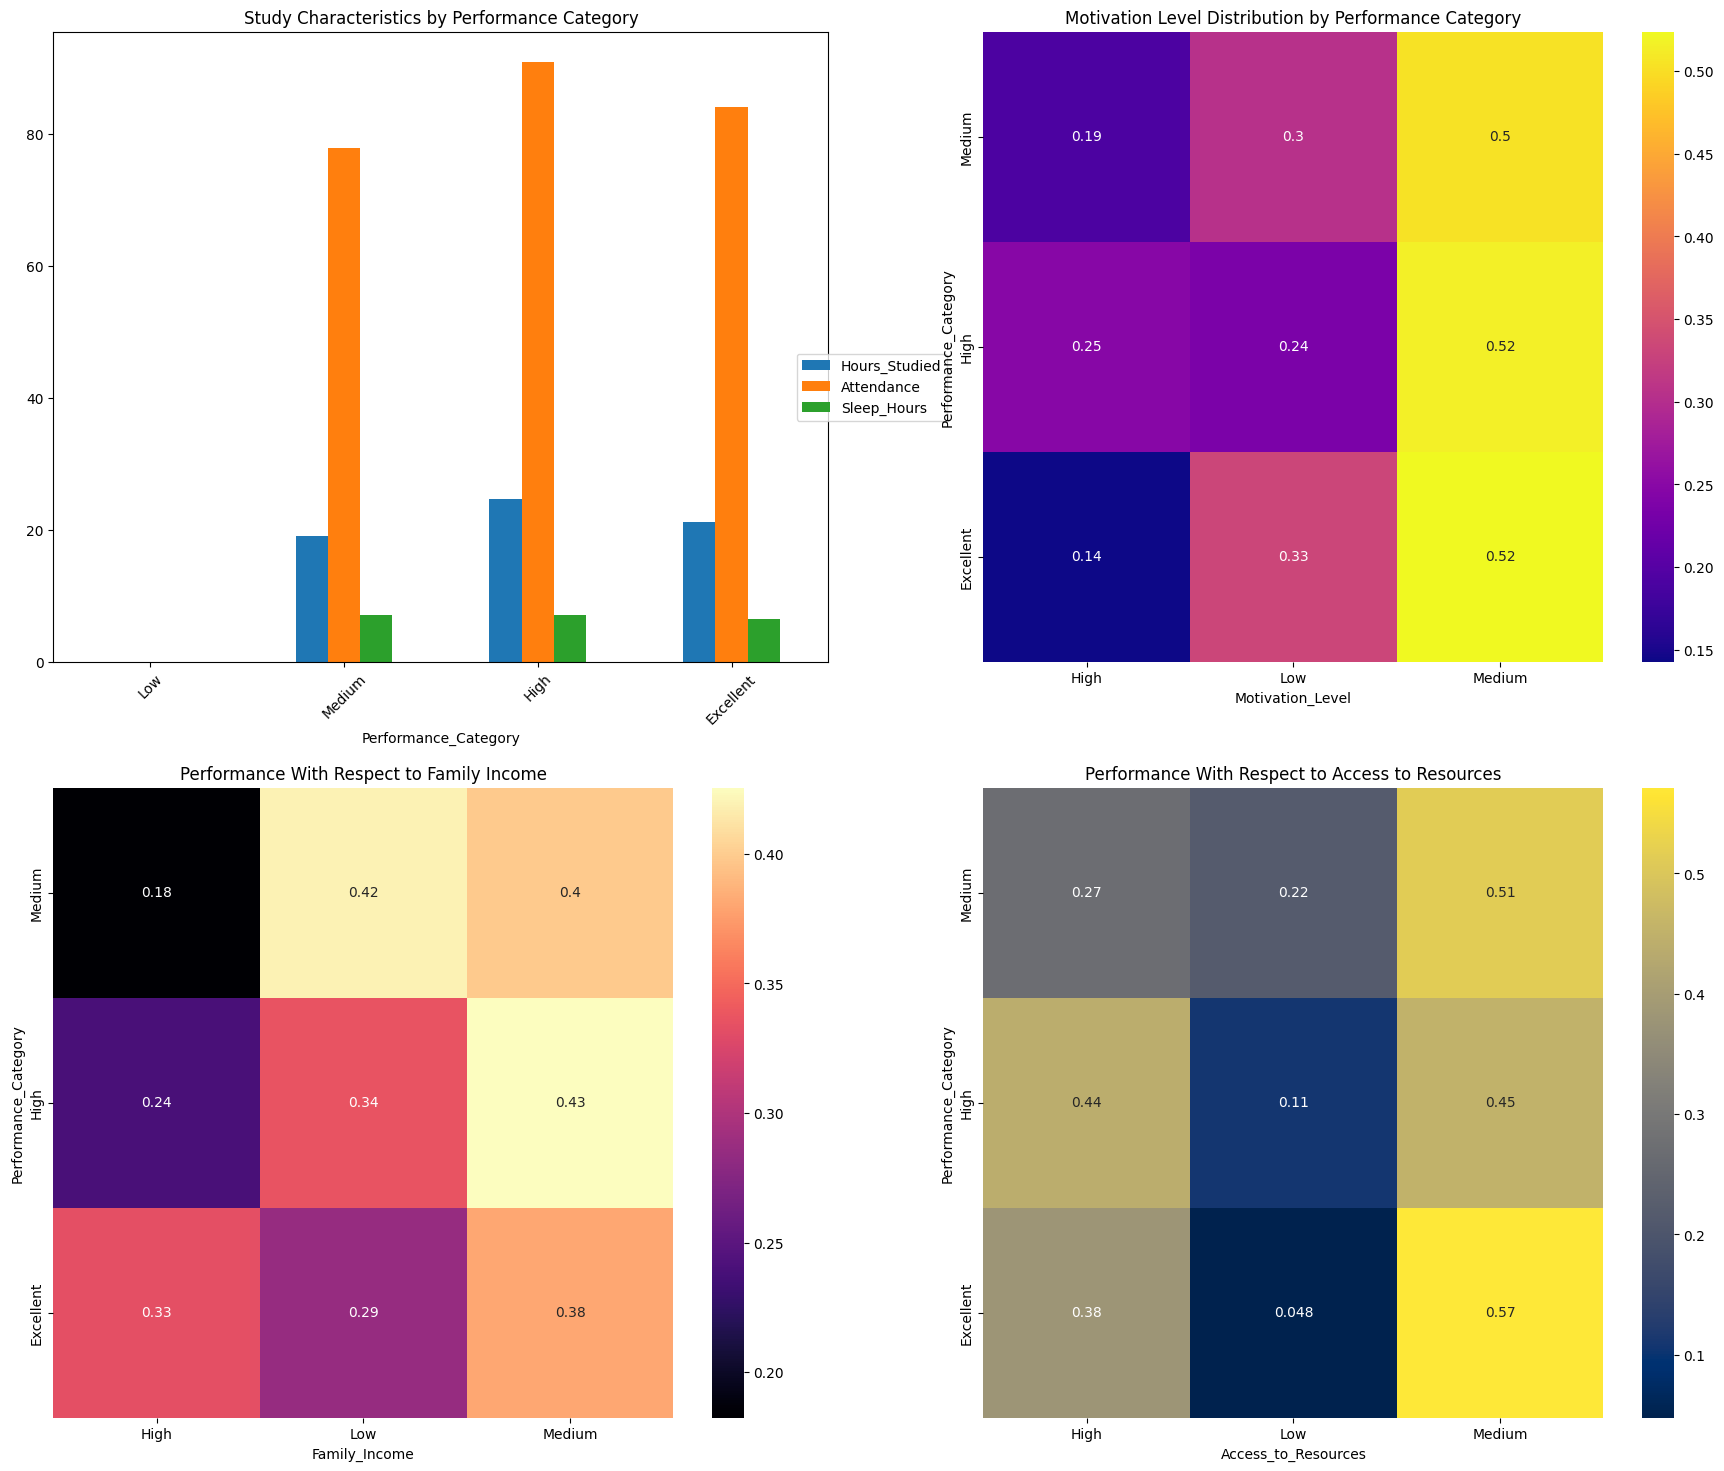

In [85]:
df['Performance_Category'] = pd.cut(df['Exam_Score'], bins=[0, 50,70,89, 100], labels=['Low', 'Medium', 'High','Excellent'])

fig,axes = plt.subplots(2,2, figsize=(22,18))

study_by_performance = df.groupby('Performance_Category')[['Hours_Studied','Attendance','Sleep_Hours']].mean()
study_by_performance.plot(kind='bar',ax =axes[0,0])
axes[0,0].set_title('Study Characteristics by Performance Category')
axes[0,0].tick_params(axis='x',rotation = 45)
axes[0,0].legend(bbox_to_anchor=(0.95,0.5) ,loc='upper left')

# Distribution of the Motivation level according to the performace of the students

performance_by_motivation = pd.crosstab(df['Performance_Category'],df['Motivation_Level'],normalize='index')
sns.heatmap(performance_by_motivation,annot=True,cmap='plasma',ax=axes[0,1])
axes[0,1].set_title('Motivation Level Distribution by Performance Category')

# Checking the performance with respect to the family income
performance_by_income = pd.crosstab(df['Performance_Category'],df['Family_Income'],normalize='index')
sns.heatmap(performance_by_income,annot=True,cmap='magma',ax=axes[1,0])
axes[1,0].set_title('Performance With Respect to Family Income')

# Checking the Performance with respect to the Resource
performance_by_resource = pd.crosstab(df['Performance_Category'],df['Access_to_Resources'],normalize='index')
sns.heatmap(performance_by_resource,annot=True,cmap='cividis',ax=axes[1,1])
axes[1,1].set_title('Performance With Respect to Access to Resources')

In [86]:
# Checking the unique values of object data type so that we can do the encoding of the values according to the requirements
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    print(f"\n🔹 Column: {col}")
    print("Unique Values:", df[col].unique())
    print("Count of Unique Values:", df[col].nunique())
    print("Value Counts:")
    print(df[col].value_counts(dropna=False))  # Includes NaN counts


🔹 Column: Parental_Involvement
Unique Values: ['Low' 'Medium' 'High']
Count of Unique Values: 3
Value Counts:
Parental_Involvement
Medium    3334
High      1882
Low       1324
Name: count, dtype: int64

🔹 Column: Access_to_Resources
Unique Values: ['High' 'Medium' 'Low']
Count of Unique Values: 3
Value Counts:
Access_to_Resources
Medium    3290
High      1950
Low       1300
Name: count, dtype: int64

🔹 Column: Extracurricular_Activities
Unique Values: ['No' 'Yes']
Count of Unique Values: 2
Value Counts:
Extracurricular_Activities
Yes    3896
No     2644
Name: count, dtype: int64

🔹 Column: Motivation_Level
Unique Values: ['Low' 'Medium' 'High']
Count of Unique Values: 3
Value Counts:
Motivation_Level
Medium    3310
Low       1921
High      1309
Name: count, dtype: int64

🔹 Column: Internet_Access
Unique Values: ['Yes' 'No']
Count of Unique Values: 2
Value Counts:
Internet_Access
Yes    6046
No      494
Name: count, dtype: int64

🔹 Column: Family_Income
Unique Values: ['Low' 'Medium' '

In [87]:
ordinal_mappings = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Peer_Influence': {'Negative': -1, 'Neutral': 0, 'Positive': 1},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}
}

for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

binary_cols = [
    'Extracurricular_Activities',
    'Internet_Access',
    'Learning_Disabilities',
    'School_Type',
    'Gender'
]

for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1, 'Public': 0, 'Private': 1, 'Male': 0, 'Female': 1})

print(df[list(ordinal_mappings.keys())].head())
print(df[binary_cols].head())


   Parental_Involvement  Access_to_Resources  Motivation_Level  Family_Income  \
0                     0                    2                 0              0   
1                     0                    1                 0              1   
2                     1                    1                 1              1   
3                     0                    1                 1              1   
4                     1                    1                 1              1   

   Teacher_Quality  Peer_Influence  Parental_Education_Level  \
0                1               1                         0   
1                1              -1                         1   
2                1               0                         2   
3                1              -1                         0   
4                2               0                         1   

   Distance_from_Home  
0                   0  
1                   1  
2                   0  
3                   1  
4       

In [88]:
print(df.dtypes)

Hours_Studied                    int64
Attendance                       int64
Parental_Involvement             int64
Access_to_Resources              int64
Extracurricular_Activities       int64
Sleep_Hours                      int64
Previous_Scores                  int64
Motivation_Level                 int64
Internet_Access                  int64
Tutoring_Sessions                int64
Family_Income                    int64
Teacher_Quality                  int64
School_Type                      int64
Peer_Influence                   int64
Physical_Activity                int64
Learning_Disabilities            int64
Parental_Education_Level         int64
Distance_from_Home               int64
Gender                           int64
Exam_Score                       int64
Performance_Category          category
dtype: object


In [89]:
print(df.isnull().sum())
for col in df.select_dtypes(include='int64').columns:
    print(f"\n{col}: {df[col].unique()}")

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
Performance_Category          1
dtype: int64

Hours_Studied: [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]

Attendance: [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  

In [90]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['Exam_Score','Performance_Category'],axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [92]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [93]:
from sklearn import metrics

In [94]:
lr_mae = metrics.mean_absolute_error(y_test, lr_pred)


In [95]:
lr_mse = metrics.mean_squared_error(y_test, lr_pred)

In [96]:
rf_mae = metrics.mean_absolute_error(y_test, rf_pred)

In [97]:
rf_mse =metrics.mean_squared_error(y_test, rf_pred)

In [98]:
print(f"Min Score: {df['Exam_Score'].min()}, Max Score: {df['Exam_Score'].max()}")

Min Score: 55, Max Score: 101


In [99]:
print(lr_mae)
print(lr_mse)
print(rf_mae)
print(rf_mse)

0.40668594933148877
2.2691545980209833
1.068547400611621
3.7874272171253827


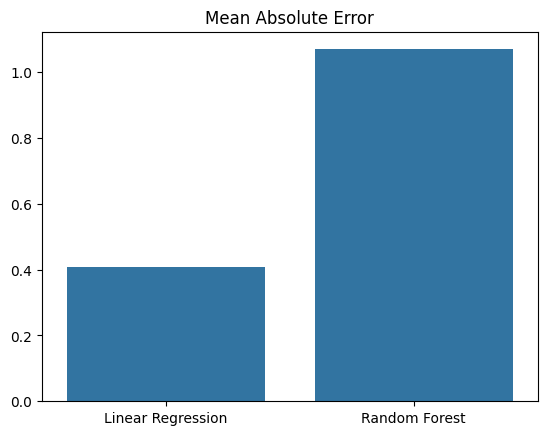

In [100]:
dict_mae = {'Linear Regression': lr_mae, 'Random Forest': rf_mae}
dict_mse = {'Linear Regression': lr_mse, 'Random Forest': rf_mse}

sns.barplot(x=list(dict_mae.keys()), y=list(dict_mae.values()))
plt.title('Mean Absolute Error')
plt.show()

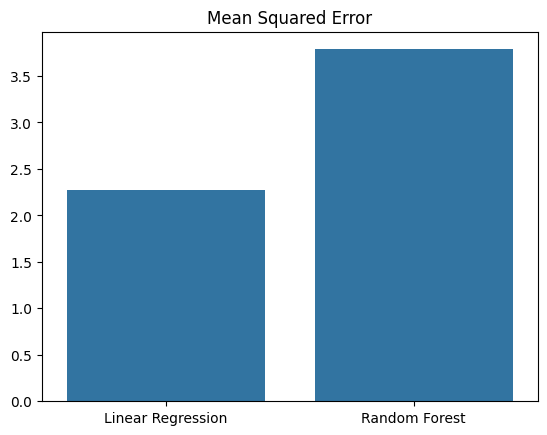

In [101]:
sns.barplot(x=list(dict_mse.keys()), y=list(dict_mse.values()))
plt.title('Mean Squared Error')
plt.show()

In [102]:
LR_predict = lr.predict(X_test)

In [103]:
print(LR_predict)

[68.88211085 61.71117905 66.11940534 ... 74.50715994 66.99704814
 64.76566667]


In [104]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # Perfect prediction line
    plt.title(f'{model_name}: Predictions vs Actual')
    plt.xlabel('Actual Exam Score')
    plt.ylabel('Predicted Exam Score')
    plt.show()

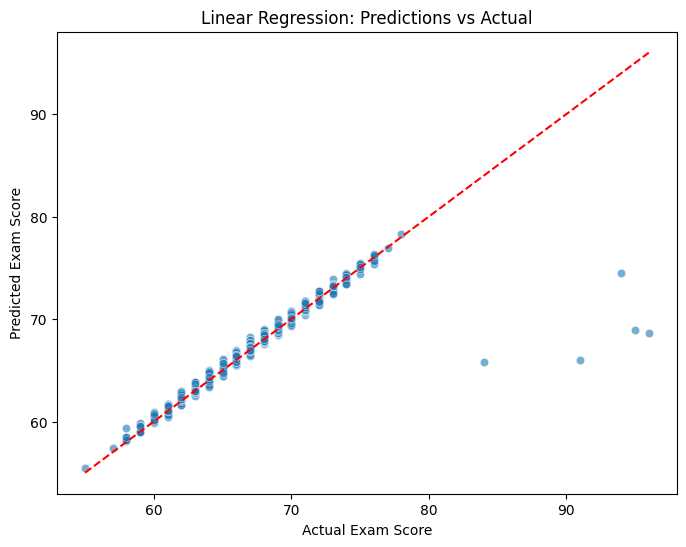

In [105]:
y_pred_lr = lr.predict(X_test)
plot_predictions(y_test, y_pred_lr, 'Linear Regression')

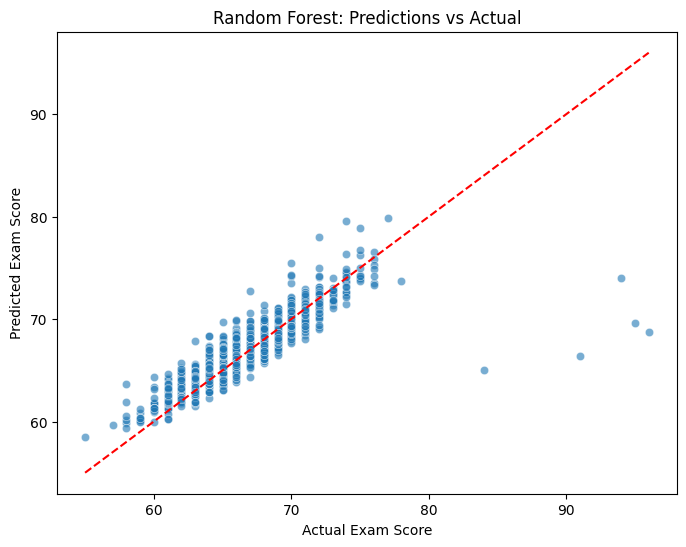

In [106]:
y_pred_rf = rf.predict(X_test)
plot_predictions(y_test, y_pred_rf, 'Random Forest')

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

degree = 2
poly_model = Pipeline([('poly',PolynomialFeatures(degree=degree)),('linear',LinearRegression())])
X = df[['Hours_Studied']]
y = df['Exam_Score']
poly_model.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


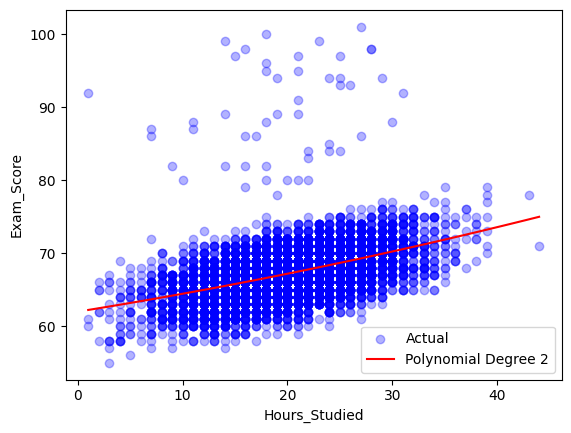

In [111]:
X_poly = np.linspace(X.min(),X.max(),100).reshape(-1,1)
y_poly = poly_model.predict(X_poly)

plt.scatter(X,y,color='blue',alpha=0.3,label='Actual')
plt.plot(X_poly,y_poly,color='red',label=f'Polynomial Degree {degree}')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.legend()
plt.show()

In [112]:
from sklearn.metrics import mean_absolute_error

y_pred = poly_model.predict(X)
mae = mean_absolute_error(y, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 2.51


In [113]:
from sklearn.model_selection import cross_val_score

degrees = [1, 2, 3, 4, 5]
mae_scores = []

for d in degrees:
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mae_scores.append(-scores.mean())

best_degree = degrees[np.argmin(mae_scores)]
print(f"Best Degree: {best_degree}")

Best Degree: 2


**CONCLUSION:**

After Cleaning and Preprocessing the data and visualizing it
I have come to the conclusion that from the two ML Models that I have used Linear Regression is performing better than Random Forest Model as the Relation of the dataset is based on linearity where the Linear Regression Model predicts better.
